# Naive Bayes

## 1. Classifying Digits
In this part we will test digits classification on the MNIST dataset, using Bernoulli Naive Bayes (a generative model), in contrast to the Multivariate Logistic Regression (a discriminative model) we saw.

The MNIST dataset contains 28x28 grayscale images of handwritten digits between 0 and 9 (10 classes). For mathmatical analysis clarity, and for matching expected API, each image faltten to create a 1D array with 784 elements.

### Loading the MNIST dataset
Load the MNIST data set. The digits dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. Use
```
mnist = sklearn.datasets.fetch_mldata('MNIST original')
```
to fetch the original data. You may set the `data_home` to where you wish to download your data for caching. Each image is already transformed into a 1D integer array $x\in [0,255]^{784}$, and the corresponding label is an integer $y\in [0,9]$.

Plot a single sample of each digit as the original image, so you get a feeling how the data looks like.

Finally, divide your data into train and test sets, using 1/7 of the data for testing.

---
**Note 1:** Using `digits = sklearn.datasets.load_digits()` will only fetch a very small sample of the original set, with images resized to 8x8. This preprocessing of the data reduces dimensionality and gives invariance to small distortions - however, we will use the original data in this exercise. Feel free to test the proformance of the algorithms below on the preprocessed data as well.

**Note 2:**
Since ML-Data is deprecated, you may wish to use something like this:
>```
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)
```

In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)

11490434/11490434 [==============================] - 0s 0us/step


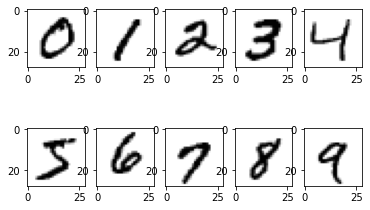

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(2,5)
for i, ax in enumerate(ax.flatten()):
    im_idx = np.argwhere(y_train == i)[0]
    plottable_image = np.reshape(x_train[im_idx], (28, 28))
    ax.imshow(plottable_image, cmap='gray_r')

### Bernoulli Naive Bayes
If we know how the digits are generated, then we know how to classify them (simply choose the digit class which will maximize the posterior probability) --- but which model should we use for describing the digits generation?

In this part we will try a very simplified model of digits creation (which is obviously not the same as the "real" model), using a Naive Bayes over an underlying Bernoulli distribution --- that is, we will assume that given a digit class, the pixels of the images are the result of independent coin flips, each with its own "head" probability.

Note that since we assume each pixl is either 0 (black) or 1 (white), we will need to adjust (preprocess) our data accrodingly (see below).

So, the model is stated as follows:
$$
\begin{align}
\text{Domain} && x \in \{0,1\}^{784} \\
\text{Prior} && \pi_j = \Pr(y=j) \\
\text{Likelihood} && P_j(x) = \Pr(x | y=j) \\
\end{align}
$$

Where for each $i\in 0\ldots 784$ it holds that
$$
P_{ji}(x_i) = \Pr(x_i | y=j) =
\begin{cases}
p_{ji} & \text{if } x_i=1 \\
1-p_{ji} & \text{if } x_i=0 \\
\end{cases}
$$


#### Question 1
Write the classification rule based on this Naive Bayes model.
How would you esitmate each of the parameters of the model based on the trainning data?
Describe in text (preferably math notationns) the classification rule, and explain.

**Note:** Think of edge cases which may effect your estimator in an undesired way.

#### Answer 1
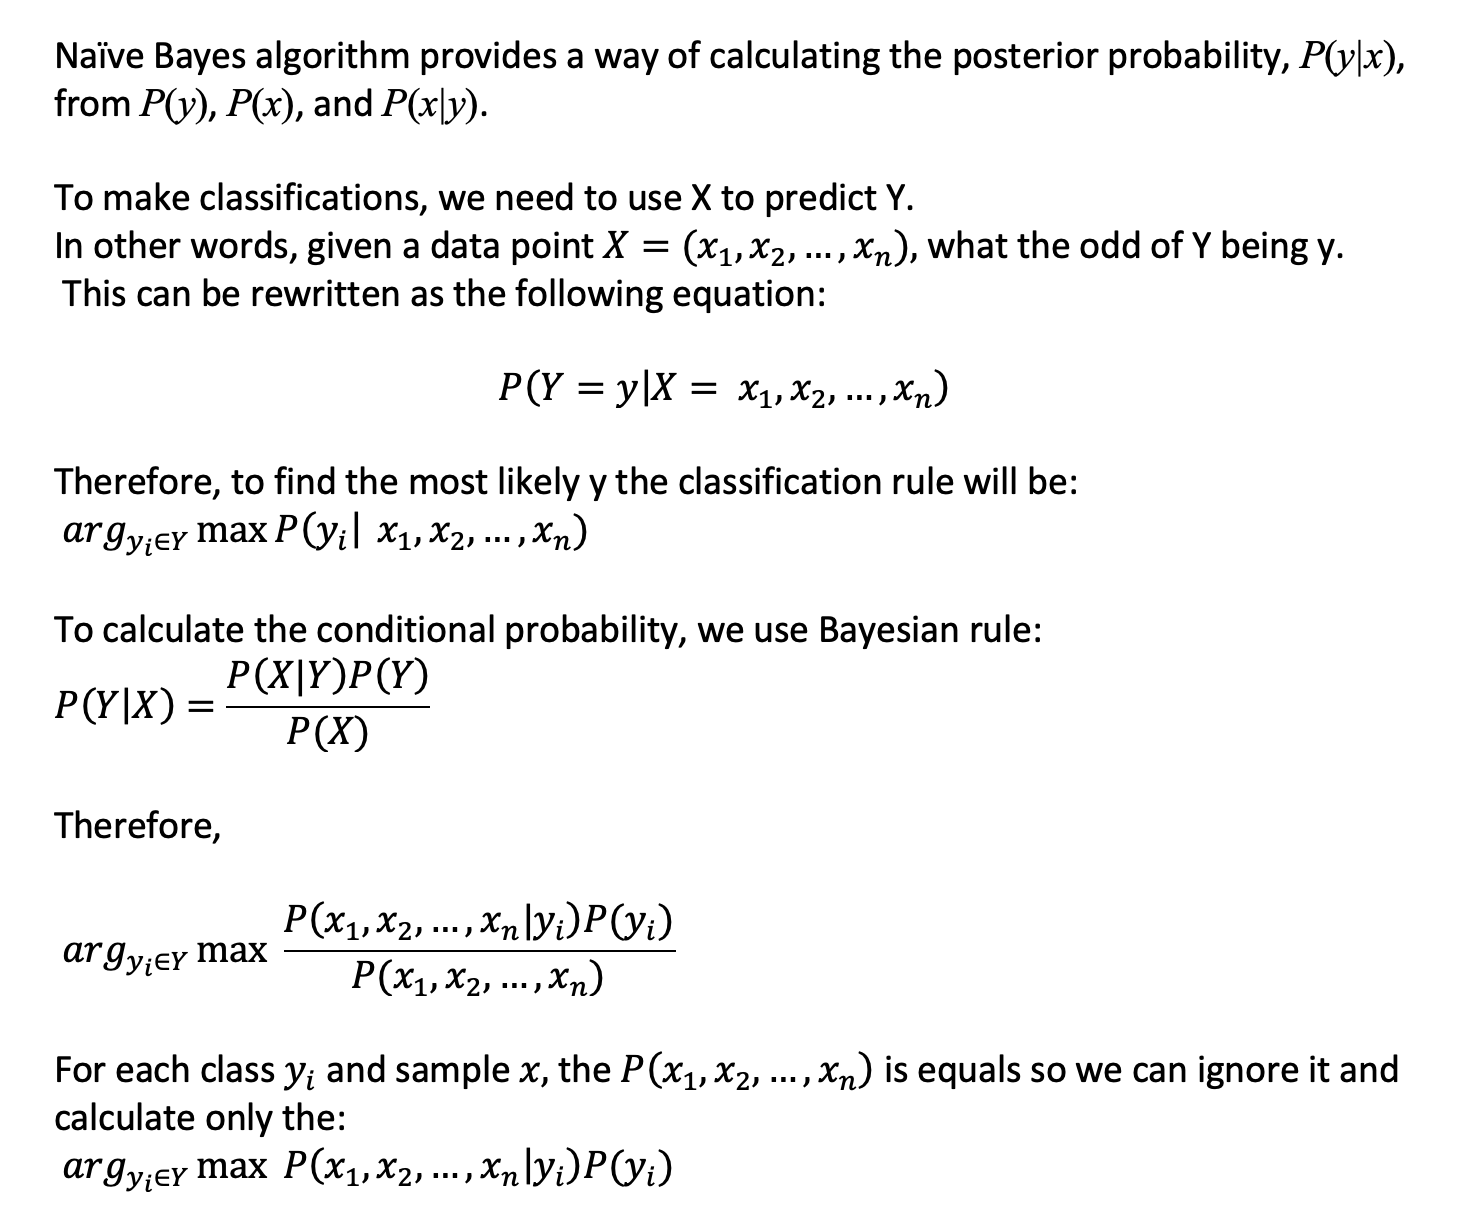

#### Question 2
Run a Naive Bayes classifier on the training data and apply predictions on the test data. Use the [sklearn.naive_bayes.BernoulliNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html) implementation (see the [source code for sklearn.naive_bayes](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/naive_bayes.py) for details).

Remember we need to preprocess the data in this case such that each pixel would become either black (0) or white (1). For this, use the `binarize` parameter of the implementation. Set this value to $0$ (this is the default), which in this case would mean every pixel with non-zero value will be set to 1.

1. Plot the mean image of each class (estimated $\hat{p}_{ji}$) and generate one sample of each class (remember, you can do this since this is a generative model). You will need to access the `feature_log_prob_` attribute of the trained model.

2. Plot the confusion matrix of your classifier, as claculated on the test data (it is recommended to use [sklearn.metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)). Calculate the total accuracy (fraction of correctly classified images), and summarize the results in your own words.

3. Think of a way you can find the optimal threshold of the binarization part. **There is no need to actually perform this task --- just describe what you would have done.**


#### Answer 2


In [ ]:
#naive bayes
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB()
nb.fit(x_train, y_train)
pred = nb.predict(x_test)

1)

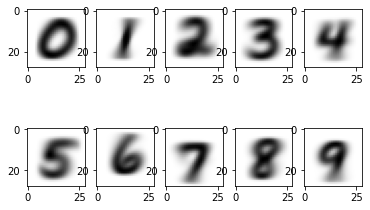

In [ ]:
fig, ax = plt.subplots(2,5)
for i, ax in enumerate(ax.flatten()):
    im_idx = np.exp(nb.feature_log_prob_[i])
    plottable_image = im_idx.reshape((28, 28))
    ax.imshow(plottable_image, cmap='gray_r')

2)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


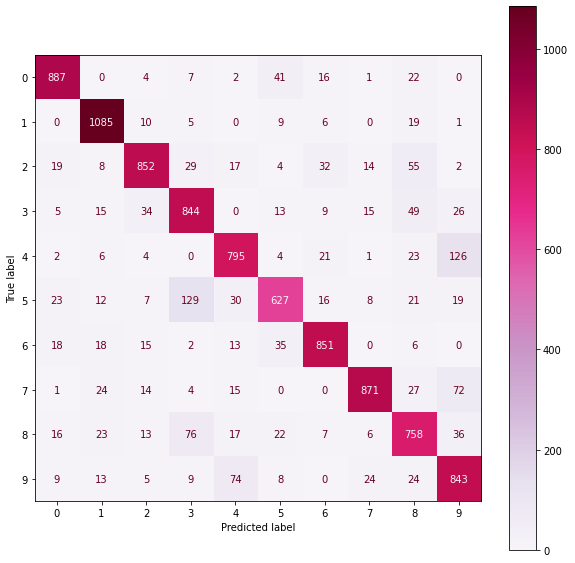

In [ ]:
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(nb, x_test, y_test, cmap='PuRd', ax=ax)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred)
print('The total accuracy is:', accuracy)

The total accuracy is: 0.8413


**summarize**:
On the confusion matrix plot, the diagonal cells correspond to samples that are correctly classified and the off-diagonal cells correspond to incorrectly classified observations. In this result we can see that the class with the most correctly classified samples is class 1 and the class with the least most correctly classified samples is class 5.
Moreover, the highest number of incorrect classification is for samples in class 5 which were classified as class 3.‏

3)
For finding the optimal threshold of the binarization part we would have try different thresholds and see which one return the best results in terms of accuracy.

## 2. Classifing Text Documents using Multinomial Naive Bayes
In this exercise you will classify the "20 newsgroups" data set using your own naive bayes classifier and compare to the scikit learn built in version.

The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon messages posted before and after a specific date.

### You task
Implement the barebone class provided: `NaiveBayes(BaseEstimator, ClassifierMixin)` and implement its `fit`, `predict` and `predict_proba` methods.

Then follow next anlysis guidlinnes using the implemented class for train and test classifier:
* Load the **train** data using `from sklearn.datasets import fetch_20newsgroups`. remove headers, footers and quotes (see documentation)
* Use `sklearn.feature_extraction.text import CountVectorizer` to count words (stop_words='english')
* use `sklearn.pipeline.make_pipeline` to chain the vectroizer and model.
* note: limit the vocuabolary size if you suffer memory issues
* compare the accuracy over the **test** data. You can use `accuracy_score, classification_report`
* compare to the built in `sklearn.naive_bayes.MultinomialNB`
* compare to `TfidfVectorizer` preprocessing (you can use the built in model for doing the analysis)
* plot the learning curve - is the model in the bias or variance regime (you can use the built in model for doing the analysis)
* optimize performance in respect to vectorizer hyper parameters (e.g. max_features, max_df etc.).


In [ ]:
from collections import Counter
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np

class NaiveBayes(BaseEstimator, ClassifierMixin):
  '''
  BaseEstimator and ClassifierMixin are imported from sklearn.base
  '''
  def __init__(self):
    self.prior = {}
    self.likelihood = {}
    self.num_classes = 0

  def fit(self, x, y):
    '''Fit Naive Bayes according to x, y, calaculate prior and likelihood'''
    x = x.toarray()
    all_class = list(set(y))
    self.num_classes = len(all_class)
    #calculate prior
    count_labels = Counter(y)
    num_of_samples = len(y)
    for key, value in count_labels.items():
      self.prior[key] = value / num_of_samples

    #calculate likelihood
    for cls in all_class:
      class_array = x[y==cls]
      class_df = pd.DataFrame(class_array)
      prob = {} #key: class, values: {key: word, val: prob}
      count_words = class_df.sum()
      num_of_words = sum(count_words)
      for num in range(len(count_words)):
        key = count_words.index[num]
        prob[key] = (count_words[num] + 1) / (num_of_words + 2)  #use laplace correction for handling probability zero
      self.likelihood[cls] = prob

  def predict_log_proba(self, x):
    '''Return log-probability estimates for the test vector X'''
    x = pd.DataFrame(x.toarray())
    posterior = {}    #key:doc, value: list of probability for each class
    for index, row in x.iterrows():
      df_row = row[row!=0]
      features_names = df_row.index
      prob_post = {}
      for label in range(self.num_classes):
        proba = self.prior[label]
        for word in features_names:
          if word in self.likelihood[label].keys():
            proba *= self.likelihood[label][word]
        proba = np.log(proba)
        prob_post[proba] = label
      posterior[index] = prob_post #{key:doc, val:{key:proba val:label}}
    return posterior

  def predict(self, x):
    '''Perform classification on an array of test vectors X'''
    posterior = self.predict_log_proba(x)
    pred_class = []
    for key, value in posterior.items():
      max_val = max(value.keys())
      pred_class.append(value[max_val])
    return pred_class

In [ ]:
from sklearn.datasets import fetch_20newsgroups
x_train, y_train = fetch_20newsgroups(subset="train",remove = ('headers','footers','quotes'),return_X_y= True)
x_test, y_test = fetch_20newsgroups(subset="test",remove = ('headers','footers','quotes'),return_X_y= True)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
count_vect = CountVectorizer(stop_words='english', max_features= 1000)
my_NB = NaiveBayes()
pipe = make_pipeline(count_vect,my_NB)
pipe.fit(x_train, y_train)
predict = pipe.predict(x_test)

print(f"the accuracy of our model is :{accuracy_score(y_test,predict)}\n{classification_report(y_test,predict)}")

<ipython-input-5-87c37d877ef0>:50: RuntimeWarning: divide by zero encountered in log
  proba = np.log(proba)


the accuracy of our model is :0.4317578332448221
              precision    recall  f1-score   support

           0       0.26      0.39      0.31       319
           1       0.43      0.50      0.47       389
           2       0.00      0.00      0.00       394
           3       0.41      0.41      0.41       392
           4       0.41      0.51      0.45       385
           5       0.63      0.52      0.57       395
           6       0.76      0.71      0.74       390
           7       0.45      0.57      0.50       396
           8       0.35      0.57      0.43       398
           9       0.44      0.57      0.49       397
          10       0.27      0.31      0.29       399
          11       0.79      0.51      0.62       396
          12       0.37      0.43      0.40       393
          13       0.44      0.42      0.43       396
          14       0.68      0.44      0.53       394
          15       0.46      0.44      0.45       398
          16       0.45      0.4

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
mnb = MultinomialNB()
pipe = make_pipeline(count_vect,mnb)
pipe.fit(x_train, y_train)
predict = pipe.predict(x_test)

print(f"the accuracy MultinomialNB is :{accuracy_score(y_test,predict)}\n{classification_report(y_test,predict)}")

the accuracy MultinomialNB is :0.4638874137015401
              precision    recall  f1-score   support

           0       0.29      0.42      0.34       319
           1       0.44      0.57      0.50       389
           2       0.00      0.00      0.00       394
           3       0.40      0.47      0.43       392
           4       0.43      0.50      0.46       385
           5       0.60      0.56      0.58       395
           6       0.75      0.70      0.73       390
           7       0.48      0.56      0.52       396
           8       0.41      0.53      0.46       398
           9       0.48      0.58      0.53       397
          10       0.31      0.37      0.34       399
          11       0.74      0.55      0.63       396
          12       0.38      0.40      0.39       393
          13       0.46      0.46      0.46       396
          14       0.69      0.47      0.56       394
          15       0.49      0.58      0.53       398
          16       0.45      0.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(x_train)
vectors_test = vectorizer.transform(x_test)
clf = MultinomialNB()
clf.fit(vectors, y_train)
predict = clf.predict(vectors_test)

print(f"the accuracy by using TfidfVectorizer is :{accuracy_score(y_test,predict)}\n{classification_report(y_test,predict)}")

the accuracy by using TfidfVectorizer is :0.6062134891131173
              precision    recall  f1-score   support

           0       0.81      0.07      0.13       319
           1       0.72      0.62      0.67       389
           2       0.70      0.50      0.59       394
           3       0.55      0.75      0.64       392
           4       0.81      0.61      0.69       385
           5       0.83      0.74      0.78       395
           6       0.86      0.69      0.77       390
           7       0.82      0.68      0.74       396
           8       0.89      0.63      0.73       398
           9       0.95      0.69      0.80       397
          10       0.59      0.90      0.71       399
          11       0.47      0.80      0.59       396
          12       0.77      0.43      0.55       393
          13       0.86      0.63      0.73       396
          14       0.84      0.63      0.72       394
          15       0.22      0.95      0.36       398
          16       0

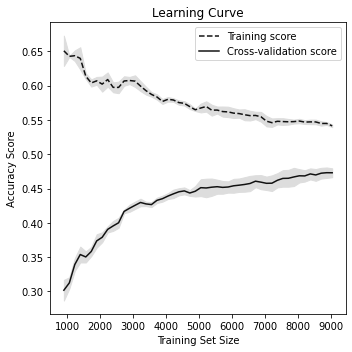

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
count_vect = CountVectorizer(stop_words='english', max_features= 1000)
x_train_cv = count_vect.fit_transform(x_train)
train_sizes, train_scores, test_scores = learning_curve(NaiveBayes(), x_train_cv, y_train, scoring='accuracy', n_jobs=4, train_sizes=np.linspace(0.1, 1.0, 50))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.subplots(1, figsize=(5,5))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

optimize performance in respect to vectorizer hyper parameters:

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
def optimize_hyperparameters(a, b):
  count_vect1 = CountVectorizer(max_features = a, stop_words = "english", max_df = b)
  X_train_cv1 = count_vect1.fit_transform(x_train)
  X_test_cv1 = count_vect1.transform(x_test)
  mnb1 = MultinomialNB()
  mnb1.fit(X_train_cv1, y_train)
  y_pred_cv_mnb1 = mnb1.predict(X_test_cv1)
  print("by defining max_features = {}, max_df = {} the accuracy is: {}".format(a,b, accuracy_score(y_test, y_pred_cv_mnb1)))

In [ ]:
optimize_hyperparameters(2000, 0.25)
optimize_hyperparameters(2000, 0.75)
optimize_hyperparameters(4000, 0.25)
optimize_hyperparameters(4000, 0.75)
optimize_hyperparameters(6000, 0.25)
optimize_hyperparameters(6000, 0.75)

by defining max_features = 2000, max_df = 0.25 the accuracy is: 0.5322623473181094
by defining max_features = 2000, max_df = 0.75 the accuracy is: 0.5322623473181094
by defining max_features = 4000, max_df = 0.25 the accuracy is: 0.5813860860329262
by defining max_features = 4000, max_df = 0.75 the accuracy is: 0.5813860860329262
by defining max_features = 6000, max_df = 0.25 the accuracy is: 0.6032926181625067
by defining max_features = 6000, max_df = 0.75 the accuracy is: 0.6032926181625067


**conclusion:**It can be seen that as the max features increases, the accuracy increases, moreover the max_df doesn't affect the accuracy

#### Model interpretability
Find the most important features for a **specific** decision of a NB classifier.
Because the model has learned the prior $p(x_i|c)$ during the training, the contribution of an individual feature value can be easily measured by the posterior, $p(c|x_i)=p(c)p(x_i|c)/p(x_i)$
Implement a function which gets a scikit-learn NB model as input and returns $P(c|x_i)$:

`def calc_p_c_given_xi(model)`

Hint: Use the following model properties:

* `model.class_log_prior_`
* `model.feature_log_prob_`

Note: remember these are logs and you need to use np.exp and normalize to get $P(c|x_i)$
Another hint: use numpy built-in broadcasting property.

* Use the interpretation to examine errors of the classifier where $\hat{c}\ne c$. Which top words support the correct class and which support the wrong class? You can use the `print_txt` below to color words.

In [ ]:
import string
def print_txt(txt, hot, cold):
  """
  print the text, coloring hot and cold words with colors
  """
  cold_color='\x1b[41;37m{}\x1b[0m'
  hot_color='\x1b[42;37m{}\x1b[0m'
  mid_color='\x1b[45;37m{}\x1b[0m'
  def color(token):
    lower = str(token).lower()
    lower = lower.replace('\t','').replace('\n','')
    lower = lower.translate(string.punctuation)
    if (lower in hot) and (lower in cold):
      return mid_color.format(token)
    elif lower in hot:
      return hot_color.format(token)
    elif lower in cold:
      return cold_color.format(token)
    else:
      return token
  colored_txt = " ".join([color(token) for token in txt.split(' ')])
  print(colored_txt)
print_txt('This word support the first class but this the other', ['word'],['other'])

This word support the first class but this the other


In [ ]:
def calc_p_c_given_xi(model):
  prior = model.class_log_prior_
  likelihood = model.feature_log_prob_
  return_list = []
  for class_prior in range(len(prior)):
    res = np.exp(prior[class_prior])
    features = []
    for prob in likelihood[class_prior]:
      proba = np.exp(prob) * res
      features.append(proba)
    return_list.append(features)
  return np.matrix(return_list)

In [ ]:
model = mnb.fit(x_train_cv, y_train)
res = calc_p_c_given_xi(model)
df_res = pd.DataFrame(res, columns=count_vect.get_feature_names())
x_test_cv = count_vect.fit_transform(x_test)
y_pred_cv_mnb = mnb.predict(x_test_cv)
data = {'predict': y_pred_cv_mnb,'true': y_test}
df_lable = pd.DataFrame(data)
df_lable

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,predict,true
0,7,7
1,11,5
2,17,0
3,14,17
4,14,19
...,...,...
7527,14,14
7528,5,4
7529,8,9
7530,1,6


It can be seen that document 1 was misclassified and therefore chosen to examine it

In [ ]:
doc1 = x_test[1].lower()
class5True = df_res.iloc[5]
class11pred = df_res.iloc[11]
top200C5 = class5True.sort_values(ascending=False).head(200).index
top200C11 = class11pred.sort_values(ascending=False).head(200).index
print_txt(doc1, top200C5, top200C11)

i'm not familiar at all with the format of these "x-face:" thingies, but
after seeing them in some folks' headers, i've *got* to *see* them (and
maybe make one of my own)!

i've got "dpg-view" on my linux box (which displays "uncompressed x-faces")
and i've managed to compile [un]compface too... but now that i'm *looking*
for them, i can't seem to find any x-face:'s in anyones news headers!  :-(

could you, would you, please send me your "x-face:" header?

i *know* i'll probably get a little swamped, but i can handle it.

	...i hope.


#### Think and describe:
#### How can you correct the analyzed error?

To read more about model interpretation, see the blogpost below and the tutorial:
* https://lilianweng.github.io/lil-log/2017/08/01/how-to-explain-the-prediction-of-a-machine-learning-model.html
* https://github.com/chanansh/right_but_why

**Answer:** We can correct the analyzed error by reduce the importance of the words which support the wrong class.
It can be done by correct their liklihood probability in the class - p(xᵢ|c)